# JupyterLab Demos

- Demo 1: Uploading Data to the platform via JupyterLab
- Demo 2: Connecting to available databases on the data science platform
- Demo 3: Extracting your output from the platform


## Demo 1: Upload & Use Dataset


#### Step 1: Download CSV file from https://www.uktradeinfo.com/Statistics/Pages/DataDownloads.aspx -> Current month -> Traders Files -> Importers

To upload data you need to ensure it is stored somewhere. I.e. you can find it via file explorer, this includes sharepoint, onedrive and your local pc. For our demo we download data from the hmrc website and store it on our local machines. 

<img src="/templates/demo1s1.png" alt="Drawing" style="width: 600px;" align="center"/>

#### Step 2: Unzip the CSV

#### Step 3: Create data Folder (/data) & Step 4: Upload CSV in data folder

After logging in to the platform via this link: https://data.trade.gov.uk/, the screen below should appear in your browser. On the far left it shows whatever files/folders you already have saved in your personal workspace. If you don't see this screen you should be able to click on the file browser tab.

You can either upload a file straight into here or create a folder to store it in. We create a folder called ‘data’ to store it in.
To do this click the button to create an untitled folder, this can easily be renamed by right clicking and selecting rename. Next you can navigate to the folder and upload the CSV from step 2 using the upload button.

<img src="/templates/demo1s3-4.png" alt="Drawing" style="width: 600px;" align="center"/>

#### Step 4: Load dataset in Dataframe


In [5]:
df <- read.csv('data/importers1906..txt', header=F, row.names=NULL, sep='\t')

#### Step 5: Check results

In [2]:
head(df, 5)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59
201906,1,MARK PRICE TEXTILES,''TWO HOOTS'',MELTON ROAD,HICKLING PASTURES,LEICESTER,,LE14 3QG,58064000,,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
201906,1,PETER GRAHAM WHITEHEAD,'A' HANGAR,SLEAP AIRFIELD,HARMER HILL,SHREWSBURY,,SY4 3HE,84812010,,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
201906,1,F D COPELAND & SONS LTD,'COLANOL HOUSE',5 WESTFIELD STREET,WOOLWICH,LONDON,,SE18 5TL,29052990,,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
201906,1,FESTIVE PRODUCTIONS LTD,'OTTERS BROOK',TY COCH WAY,CWMBRAN,,,NP44 7XE,39199080,,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
201906,1,MAHALINGAM PARTHIPAN,04 BEFORD ROAD,EASTHAM,LONDON,,,E6 2NN,3,,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


## Demo 2: Connect to the database

Many of the datasets are very large. To avoid overloading the notebook's memory it is adviced to filter the data on the database level instead of loading everything in the notebooks and then manipulating the data. To do this filters, limit, aggregation, etc can be used in SQL.

#### Step 1: Connect to database

To start working with the DB, a database connection string needs to be loaded. This can be done by clicking the DB icon in JupyterHub.  
    
<img src="/templates/demo3s1.png" alt="Drawing" style="width: 800px;"/>

#### Step 2: Check connection 

The connection strings you have permissions for will shown in the output.
        

In [1]:
library(stringr)
library(DBI)
getConn <- function(dsn) {
  user <- str_match(dsn, "user=([a-z0-9_]+)")[2]
  password <- str_match(dsn, "password=([a-zA-Z0-9_]+)")[2]
  port <- str_match(dsn, "port=(\\d+)")[2]
  dbname <- str_match(dsn, "dbname=([a-z0-9_\\-]+)")[2]
  host <- str_match(dsn, "host=([a-z0-9_\\-\\.]+)")[2]
  con <- dbConnect(RPostgres::Postgres(), user=user, password=password, host=host, port=port, dbname=dbname)
  return(con)
}
isDsn <- function(name) {
  return(startsWith(name, "DATABASE_DSN__"))
}
niceName <- function(name) {
  return(substring(name, 15))
}
env = Sys.getenv(names=TRUE)
dsns <- env[Vectorize(isDsn)(names(env))]
conn <- Vectorize(getConn)(unname(dsns))
names(conn) <- Vectorize(niceName)(names(dsns))
print(paste("You now have", as.character(length(conn)), "database connections:", sep=" "))
for (name in names(conn)) {
  var_name <- paste("conn", name, sep="_")
  assign(var_name, conn[[c(name)]])
  print(paste(" ", var_name, sep=""))
}
rm(conn,getConn,isDsn,niceName,env,dsns)

[1] "You now have 1 database connections:"
[1] " conn_datasets_1"


In [6]:
library(stringr)
library(DBI)
getConn <- function(dsn) {
  user <- str_match(dsn, "user=([a-z0-9_]+)")[2]
  password <- str_match(dsn, "password=([a-zA-Z0-9_]+)")[2]
  port <- str_match(dsn, "port=(\\d+)")[2]
  dbname <- str_match(dsn, "dbname=([a-z0-9_\\-]+)")[2]
  host <- str_match(dsn, "host=([a-z0-9_\\-\\.]+)")[2]
  con <- dbConnect(RPostgres::Postgres(), user=user, password=password, host=host, port=port, dbname=dbname)
  return(con)
}
isDsn <- function(name) {
  return(startsWith(name, "DATABASE_DSN__"))
}
niceName <- function(name) {
  return(substring(name, 15))
}
env = Sys.getenv(names=TRUE)
dsns <- env[Vectorize(isDsn)(names(env))]
conn <- Vectorize(getConn)(unname(dsns))
names(conn) <- Vectorize(niceName)(names(dsns))
print(paste("You now have", as.character(length(conn)), "database connections:", sep=" "))
for (name in names(conn)) {
  var_name <- paste("conn", name, sep="_")
  assign(var_name, conn[[c(name)]])
  print(paste(" ", var_name, sep=""))
}
rm(conn,getConn,isDsn,niceName,env,dsns)

[1] "You now have 1 database connections:"
[1] " conn_datasets_1"


#### Step 3: Retrieve data from the DB using SQL

##### Step 3.1: Get all available tables

In a database, tables are organised within schemas. A database may have one or more schemas, and each one of these may have many tables. In PostgreSQL, the default schema is called 'public', and we will use it in the following examples.

In [4]:
library(DBI)
dbListObjects(conn_datasets_1) 

table,is_prefix
<Id> schema = ons.gdp_components,TRUE
<Id> schema = ons.trade_in_goods.part_2.quarterly,TRUE
<Id> schema = ons.uk_economic_accounts.part_6.monthly,TRUE
<Id> schema = ons.pink_book.part_1.quarterly,TRUE
<Id> schema = ons.uk_economic_accounts.part_5,TRUE
<Id> schema = ons.uk_economic_accounts.part_6.quarterly,TRUE
<Id> schema = ons.pink_book.part_3.monthly,TRUE
<Id> schema = unctad.fdi.inward_stock_usd,TRUE
<Id> schema = ons.trade_in_goods.part_2.yearly,TRUE
<Id> schema = ons.uk_economic_accounts.part_3,TRUE


In [5]:
dbListObjects(conn_datasets_1, Id(schema = "oecd.tiva"))

table,is_prefix
"<Id> schema = oecd.tiva, table = L1",FALSE


##### Step 3.2: Check columns of a table

In [6]:
dbListFields(conn_datasets_1, Id(schema = "oecd.tiva", table= "L1"))

[1] "source_country"       "source_industry"      "exporting_country"   
 [4] "exporting_industry"   "value"                "source_country_eu"   
 [7] "exporting_country_eu" "value_world"          "year"                
[10] "id"

##### Step 3.3.: Checkout a few rows in a table

When a query is executed, the data will be stored in memory. Many datasets have more data then is suitable to load into memory. Loading all data in this case will crash JupyterHub. You can limit the number of results to retrieve in manageable chunck by using the LIMIT and OFFSET functionality.

In [7]:
# Retrieve the first 5 rows with the highest id's
dbGetQuery(conn_datasets_1, '
    SELECT * FROM "oecd.tiva"."L1" order by id desc OFFSET 0 LIMIT 5;
')

source_country,source_industry,exporting_country,exporting_industry,value,source_country_eu,exporting_country_eu,value_world,year,id
World,C75,Rest of world,C75,0.700,FALSE,FALSE,0.700,2011,63889782
Rest of world,C75,Rest of world,C75,0.699,FALSE,FALSE,0.700,2011,63889781
World,C73T74,Rest of world,C75,0.022,FALSE,FALSE,0.022,2011,63889780
Rest of world,C73T74,Rest of world,C75,0.012,FALSE,FALSE,0.022,2011,63889779
United States,C73T74,Rest of world,C75,0.002,FALSE,FALSE,0.022,2011,63889778


In [26]:
# Retrieve the next 5 rows with the highest id's
dbGetQuery(conn_datasets_1, '
    SELECT * FROM "oecd.tiva"."L1" order by id desc OFFSET 5 LIMIT 5;
')

source_country,source_industry,exporting_country,exporting_industry,value,source_country_eu,exporting_country_eu,value_world,year,id
United Kingdom,C73T74,Rest of world,C75,0.001,TRUE,FALSE,0.022,2011,63889777
Japan,C73T74,Rest of world,C75,0.001,FALSE,FALSE,0.022,2011,63889776
Italy,C73T74,Rest of world,C75,0.001,TRUE,FALSE,0.022,2011,63889775
Germany,C73T74,Rest of world,C75,0.001,TRUE,FALSE,0.022,2011,63889774
France,C73T74,Rest of world,C75,0.001,TRUE,FALSE,0.022,2011,63889773


##### Step 3.4: Checkout specific columns in a table


In [28]:
# Retrieve 5 rows with only year, source_country, exporting_country, value_world column values
dbGetQuery(conn_datasets_1, '
    SELECT year, source_country, exporting_country, value_world FROM "oecd.tiva"."L1"
', n = 5)

year,source_country,exporting_country,value_world
2003,South Africa,Singapore,76.266
2003,Rest of world,Singapore,76.266
2003,World,Singapore,76.266
2003,Hungary,Thailand,50.764
2003,Iceland,Thailand,50.764


##### Step 3.5: Count results

In [29]:
# Count the number of distinct source countries in the dataset and the total number of rows in the dataset.
dbGetQuery(conn_datasets_1, '
    SELECT count(*) as total_rows,
    count(distinct(source_country)) as number_countries 
    FROM "oecd.tiva"."L1"
')

total_rows,number_countries
55430983,65


##### Step 3.6: Filtering results (WHERE)

In [9]:
# Filter the results by only including rows where exporting country is the United Kingdom
dbGetQuery(conn_datasets_1, '
    SELECT year, source_country, exporting_country, value_world  
    FROM "oecd.tiva"."L1"
    WHERE exporting_country = 'United Kingdom' 
    LIMIT 5;
')

count
64480


##### Step 3.7: Aggregating results (GROUP BY)

In [31]:
# Query total export value, average export value and number of rows for each source country in the dataset
dbGetQuery(conn_datasets_1, '
    SELECT source_country, sum(value_world) as total_value, 
        avg(value_world) as average_value, count(value_world) as number_rows  
     FROM "oecd.tiva"."L1"
     WHERE exporting_country = \'United Kingdom\'
     GROUP BY source_country
     LIMIT 5;
')

source_country,total_value,average_value,number_rows
Argentina,67806300,4196.978,16156
Australia,67872000,3863.836,17566
Austria,67869700,3865.904,17556
Belgium,67872700,3850.939,17625
Brazil,67867300,3920.701,17310


##### Step 3.8: Ordering results (ORDER BY)

In [34]:
# Query total export value, average export value and number of rows for each source country in the dataset 
# and order the results by total export value
dbGetQuery(conn_datasets_1, '
    SELECT source_country, 
      sum(value) as total_value, 
      avg(value) as average_value,
      count(value) as number_rows  
     FROM "oecd.tiva"."L1"
     WHERE exporting_country = \'United Kingdom\'
     GROUP BY source_country
     ORDER BY sum(value) desc
     LIMIT 8;
')

source_country,total_value,average_value,number_rows
World,67873400,3843.34256,17660
United Kingdom,55210700,3126.31901,17660
United States,1706020,96.66946,17648
Germany,1578450,89.44088,17648
France,929635,52.67648,17648
Norway,859274,48.85301,17589
Rest of world,727219,41.27717,17618
Japan,595814,33.79169,17632


#### Step 4: Plot results

##### Step 4.1: Query DB

In [2]:
# Get total export value from UK to each EU country in 2011
df <- dbGetQuery(conn_datasets_1, '
    SELECT exporting_country, sum(value) as total_export
    from "oecd.tiva"."L1" where year=\'2011\' 
        and source_country=\'United Kingdom\' 
        and exporting_country_eu=\'True\' and exporting_country != \'United Kingdom\' 
    group by exporting_country, source_country order by sum(value) desc
')
head(df)

exporting_country,total_export
Germany,189773.0
Ireland,124472.0
Netherlands,86585.0
France,84172.1
Spain,55383.6
Italy,52419.2


##### Step 4.2: Plotting results 

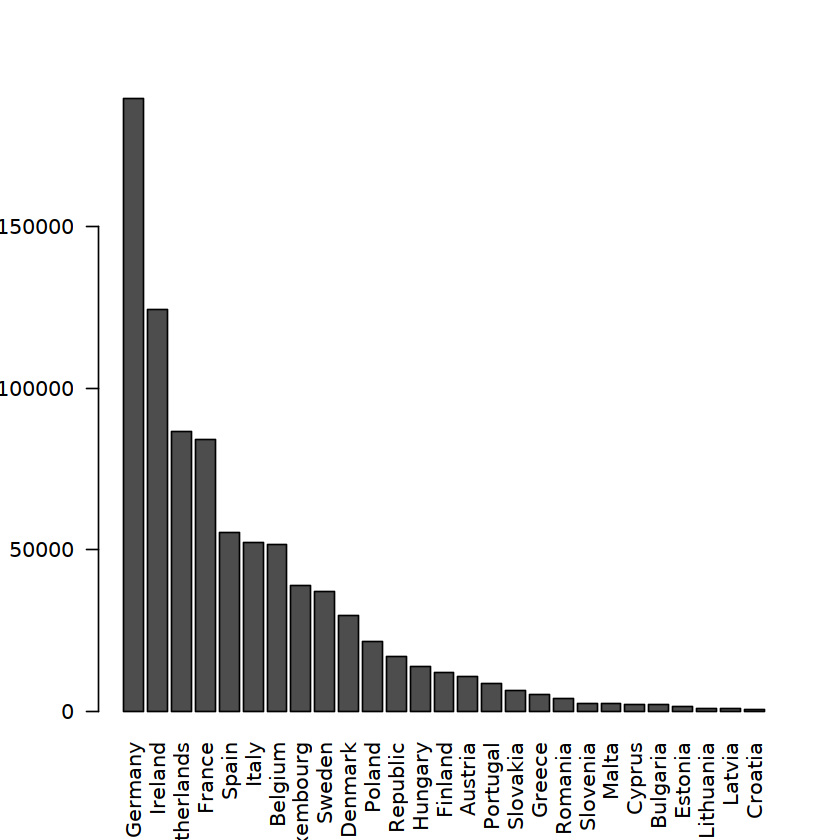

In [3]:
# set index as the exporting country column
rownames(df) <- df$exporting_country

# remove the exporting country column from the df
df$exporting_country <- NULL

# plot the results in a barplot
barplot(t(as.matrix(as.data.frame(df))), las=2) # make label text perpendicular to axis

To download the chart: shift + right-click -> save as image

## Demo 3: Export data to local machine

#### Step 1: Modify dataframe to exclude empty columns 

This demo starts from the dataframe with HMRC exporter data created in demo 1 and explains how work can be exported outside JupyterHub to your local machine.

In [6]:
# Clean up the empty columns
df_modified <- df[,c(1:10)]
head(df_modified)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
201906,1,MARK PRICE TEXTILES,''TWO HOOTS'',MELTON ROAD,HICKLING PASTURES,LEICESTER,,LE14 3QG,58064000
201906,1,PETER GRAHAM WHITEHEAD,'A' HANGAR,SLEAP AIRFIELD,HARMER HILL,SHREWSBURY,,SY4 3HE,84812010
201906,1,F D COPELAND & SONS LTD,'COLANOL HOUSE',5 WESTFIELD STREET,WOOLWICH,LONDON,,SE18 5TL,29052990
201906,1,FESTIVE PRODUCTIONS LTD,'OTTERS BROOK',TY COCH WAY,CWMBRAN,,,NP44 7XE,39199080
201906,1,MAHALINGAM PARTHIPAN,04 BEFORD ROAD,EASTHAM,LONDON,,,E6 2NN,3
201906,1,LIVERPOOL ENTERPRISE LIMITED,09 PAUL STREET,LIVERPOOL,,,,L3 6DX,70023900


#### Step 2: Save Dataframe to S3 as CSV


In [7]:
utils::write.csv(df_modified, 'data/importers_mod_R.csv')

#### Step 3: Download CSV to Local machine 

<img src="/templates/demo2s9.png" alt="Drawing" style="width: 400px;"/>

#### Step 4: Check result

<img src="/templates/demo2s10.png" alt="Drawing" style="width: 800px;"/>